<a href="https://colab.research.google.com/github/khawaji1/project_flight_delay-/blob/main/Flight_Delays_and_Cancellations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight Delays and Cancellations**

---


# **Course End Project: Data Analysis Module**

**Adnan Khawaji - Raghad Twafiq**

---


Flying has become a necessary element of our lives in the modern world. On the other hand, flight cancellations and delays can ruin our plans and make us frustrated. Collaborated on an innovative data analysis and visualization project to shed light on this problem. The complete dataset of flight cancellations and delays for 2015 is accessible on Kaggle.

**Data Loading and Initial Exploration**


Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar # Used in the Bar chart (Months)

In [ ]:
# Read from CSV file
df = pd.read_csv(r"flights.csv")
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310394,2015,3,26,4,UA,672,N454UA,ORD,LGA,950,...,1334.0,37.0,0.0,0.0,NaN,17.0,0.0,0.0,20.0,0.0
1310395,2015,3,26,4,AA,249,N564AA,DFW,EWR,951,...,1436.0,36.0,0.0,0.0,NaN,36.0,0.0,0.0,0.0,0.0
1310396,2015,3,26,4,AA,1273,N010AA,IAH,MIA,951,...,1352.0,42.0,0.0,0.0,NaN,42.0,0.0,0.0,0.0,0.0
1310397,2015,3,26,4,DL,1059,N369NW,SLC,BOS,951,...,1612.0,-7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Print number of rows and columns
print("Number of rows and columns:")
df.shape

Number of rows and columns:


(1310399, 31)

In [ ]:
# Print data type
print("Data types of columns:")
df.dtypes

Data types of columns:


YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               float64
CANCELLED              float64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [ ]:
# Print fist 10 rows
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


**Data Cleaning**

In [ ]:
# Print number of duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
duplicate_rows

Duplicate rows:


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [ ]:
# Remove missing values (NaN)
df.dropna()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [ ]:
# Drops all the values
df.dropna(how='all')

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310394,2015,3,26,4,UA,672,N454UA,ORD,LGA,950,...,1334.0,37.0,0.0,0.0,NaN,17.0,0.0,0.0,20.0,0.0
1310395,2015,3,26,4,AA,249,N564AA,DFW,EWR,951,...,1436.0,36.0,0.0,0.0,NaN,36.0,0.0,0.0,0.0,0.0
1310396,2015,3,26,4,AA,1273,N010AA,IAH,MIA,951,...,1352.0,42.0,0.0,0.0,NaN,42.0,0.0,0.0,0.0,0.0
1310397,2015,3,26,4,DL,1059,N369NW,SLC,BOS,951,...,1612.0,-7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Fill in with zero
df.fillna(0,inplace=True)
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310394,2015,3,26,4,UA,672,N454UA,ORD,LGA,950,...,1334.0,37.0,0.0,0.0,0,17.0,0.0,0.0,20.0,0.0
1310395,2015,3,26,4,AA,249,N564AA,DFW,EWR,951,...,1436.0,36.0,0.0,0.0,0,36.0,0.0,0.0,0.0,0.0
1310396,2015,3,26,4,AA,1273,N010AA,IAH,MIA,951,...,1352.0,42.0,0.0,0.0,0,42.0,0.0,0.0,0.0,0.0
1310397,2015,3,26,4,DL,1059,N369NW,SLC,BOS,951,...,1612.0,-7.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Shuffles rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print 1100 random rows
df = df.iloc[:1100]
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,14,3,F9,520,N203FR,DEN,CLE,843,...,1412.0,42.0,0.0,0.0,0,0.0,0.0,42.0,0.0,0.0
1,2015,1,3,6,WN,757,N8308K,DEN,MCO,1015,...,1604.0,24.0,0.0,0.0,0,14.0,0.0,10.0,0.0,0.0
2,2015,1,5,1,OO,5493,N727SK,DEN,TUS,1516,...,1839.0,80.0,0.0,0.0,0,0.0,0.0,16.0,64.0,0.0
3,2015,2,22,7,WN,381,N7739A,BNA,TPA,830,...,1101.0,-14.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2015,3,24,2,WN,3835,N708SW,CMH,LAS,605,...,723.0,-22.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2015,1,17,6,MQ,3310,N900MQ,ORD,CVG,2010,...,2202.0,-15.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1096,2015,1,1,4,WN,1955,N628SW,BWI,CLE,1525,...,1635.0,-5.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1097,2015,1,29,4,WN,158,N7740A,PDX,DEN,600,...,1129.0,124.0,0.0,0.0,0,0.0,0.0,124.0,0.0,0.0
1098,2015,1,25,7,WN,2684,N8601C,LAS,STL,1010,...,1535.0,20.0,0.0,0.0,0,20.0,0.0,0.0,0.0,0.0


**Exploratory Data Analysis**

In [ ]:
ARRIVAL_TIME = 'ARRIVAL_TIME'

# Print the values of the (ARRIVAL_TIME)
print(df[ARRIVAL_TIME])

0       1412.0
1       1604.0
2       1839.0
3       1101.0
4        723.0
         ...  
1095    2202.0
1096    1635.0
1097    1129.0
1098    1535.0
1099    2213.0
Name: ARRIVAL_TIME, Length: 1100, dtype: float64


In [ ]:
# Filter
df_gruop = df[(df['MONTH']==6) & (df['ARRIVAL_DELAY']>=5)]
df_gruop

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


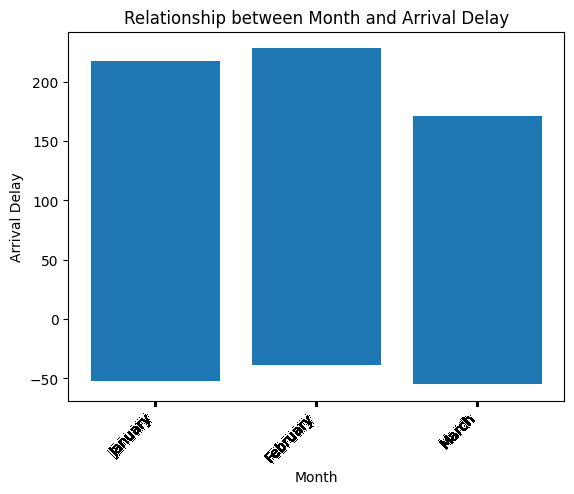

In [ ]:
m = df['MONTH']
a = df['ARRIVAL_DELAY']

plt.bar(m, a)
plt.xlabel('Month')
plt.ylabel('Arrival Delay')
plt.title('Relationship between Month and Arrival Delay')

month_labels = [calendar.month_name[int(month)] for month in m] # List of month names
plt.xticks(m, month_labels, rotation=45, ha='right')

plt.show()

**Observation**
January and March are the top two months facing delays. On the other hand, July is the lowest.

**Feature Engineering**

In [ ]:
# Converts to string
DAY = 'DAY'
df[DAY] = df[DAY].astype(str)

YEAR = 'YEAR'
df[YEAR] = df[YEAR].astype(str)

MONTH = 'MONTH'
df[MONTH] = df[MONTH].astype(str)

# Combine
df['DATE']= df['MONTH'] +"/"+ df['DAY'] +"/"+ df['YEAR']
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,14,3,F9,520,N203FR,DEN,CLE,843,...,42.0,0.0,0.0,0,0.0,0.0,42.0,0.0,0.0,1/14/2015
1,2015,1,3,6,WN,757,N8308K,DEN,MCO,1015,...,24.0,0.0,0.0,0,14.0,0.0,10.0,0.0,0.0,1/3/2015
2,2015,1,5,1,OO,5493,N727SK,DEN,TUS,1516,...,80.0,0.0,0.0,0,0.0,0.0,16.0,64.0,0.0,1/5/2015
3,2015,2,22,7,WN,381,N7739A,BNA,TPA,830,...,-14.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2/22/2015
4,2015,3,24,2,WN,3835,N708SW,CMH,LAS,605,...,-22.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3/24/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2015,1,17,6,MQ,3310,N900MQ,ORD,CVG,2010,...,-15.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1/17/2015
1096,2015,1,1,4,WN,1955,N628SW,BWI,CLE,1525,...,-5.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1/1/2015
1097,2015,1,29,4,WN,158,N7740A,PDX,DEN,600,...,124.0,0.0,0.0,0,0.0,0.0,124.0,0.0,0.0,1/29/2015
1098,2015,1,25,7,WN,2684,N8601C,LAS,STL,1010,...,20.0,0.0,0.0,0,20.0,0.0,0.0,0.0,0.0,1/25/2015


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE']

0      2015-01-14
1      2015-01-03
2      2015-01-05
3      2015-02-22
4      2015-03-24
          ...    
1095   2015-01-17
1096   2015-01-01
1097   2015-01-29
1098   2015-01-25
1099   2015-01-05
Name: DATE, Length: 1100, dtype: datetime64[ns]

In [ ]:
# Sort by the date
sort_df = df.sort_values(by='DATE')
df = sort_df
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
547,2015,1,1,4,WN,376,N684WN,DAL,DEN,810,...,-17.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
921,2015,1,1,4,OO,5588,N109SY,ATL,ORD,1524,...,-10.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
959,2015,1,1,4,US,1928,N814AW,PIT,CLT,1910,...,-19.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
920,2015,1,1,4,MQ,3688,N661MQ,EYW,MIA,1945,...,-22.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
914,2015,1,1,4,WN,942,N8611F,MDW,DEN,1735,...,18.0,0.0,0.0,0,18.0,0.0,0.0,0.0,0.0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2015,3,26,4,WN,4100,N621SW,BWI,BUF,615,...,-20.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2015-03-26
391,2015,3,26,4,WN,3759,N8309C,MDW,FLL,605,...,3.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2015-03-26
1094,2015,3,26,4,AA,1567,N574AA,STL,LAX,800,...,-18.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2015-03-26
96,2015,3,26,4,B6,76,N637JB,MSY,JFK,940,...,-16.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2015-03-26


In [ ]:
# User inputs
month = input("Please enter month from 1 to 12: ")
delay = input("please enter time delay: ")

df_md = df[(df['MONTH']==month ) & (df['ARRIVAL_DELAY']>=int(delay))]
df_md

Please enter month from 1 to 12: 12
please enter time delay: 4


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE


In [ ]:
# Replace to be readable in the chart
df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].replace({'A':'Mechanical Issues','B':'Weather','C':'Air traffic restrictions'})
df['CANCELLATION_REASON']

547     0
921     0
959     0
920     0
914     0
       ..
989     0
391     0
1094    0
96      0
233     0
Name: CANCELLATION_REASON, Length: 1100, dtype: object

In [ ]:
df2 = df[['DATE','AIRLINE','FLIGHT_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','CANCELLED','CANCELLATION_REASON']]
df2 = df[['DATE','AIRLINE','FLIGHT_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','CANCELLED','CANCELLATION_REASON']]
CHECK_CANCELLED = df2[(df2['CANCELLED']!=0)]
CHECK_CANCELLED

,DATE,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLED,CANCELLATION_REASON
279,2015-01-01,MQ,2996,DFW,VPS,1.0,Weather
753,2015-01-09,WN,440,MSP,MDW,1.0,Mechanical Issues
282,2015-01-12,EV,4921,ERI,DTW,1.0,Weather
823,2015-01-12,EV,4287,IAD,IAH,1.0,Weather
178,2015-01-23,EV,5586,ATL,FAY,1.0,Mechanical Issues
902,2015-01-26,WN,866,DCA,ATL,1.0,Weather
970,2015-01-26,US,562,PHX,BOS,1.0,Weather
875,2015-01-27,UA,271,EWR,IAH,1.0,Weather
438,2015-01-27,DL,414,SFO,JFK,1.0,Weather
498,2015-01-28,EV,4445,EWR,IND,1.0,Air traffic restrictions


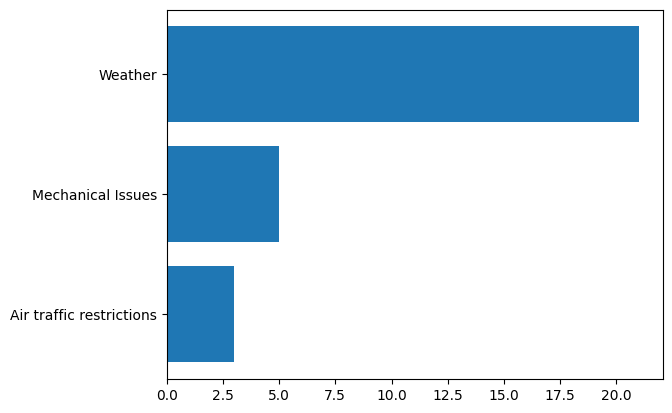

In [ ]:
# Grouping based on (CANCELLATION_REASON)
grouped = CHECK_CANCELLED.groupby('CANCELLATION_REASON').size()

# Horizontal bar chart
fig, ax = plt.subplots()
ax.barh(grouped.index, grouped.values)

plt.show()

**Observation**
The weather is the top reason for cancellations.

# Conclusion
Examine the Flight Delays and Cancellation dataset and deep diving into the data yielded insightful information about airline dependability, airport traffic patterns, aircraft types, types of delays, flight cancellations, and the impact of time on flight operations.
